In [51]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from collections import Counter
import matplotlib.patches as mpatches
sns.set_style("white")


In [40]:
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15., 6.]

In [41]:
battles=pd.read_csv('battles.csv')
character_prediction=pd.read_csv('character-predictions.csv')
character_deaths=pd.read_csv('character-deaths.csv')

In [42]:
#define additional columns related to defender count, attacker count, commander on attacking side, no of books a character appeared in

#battles.loc[:,'defender_count']
#list=[x for x in [battles[['defender_1','defender_2','defender_3','defender_4']]]]


#[x for x in battles[['defender_1','defender_2','defender_3','defender_4']]]
#battles[['defender_1','defender_2','defender_3','defender_4']]
battles.loc[:,'defender_count']=4-battles[['defender_1','defender_2','defender_3','defender_4']].isnull().sum(axis=1)
battles.loc[:,'attacker_count']=4-battles[['attacker_1','attacker_2','attacker_3','attacker_4']].isnull().sum(axis=1)
#battles.loc[:,'att_comm_count']=4-battles[['defender_1','defender_2','defender_3','defender_4']].isnull().sum(axis=1)
battles.loc[:,'att_comm_count']=[len(x.split(',')) if pd.isnull(x)!=True else np.nan for x in battles['attacker_commander']]

In [43]:
# number of commanders on attacking side
#[type(x) for x in battles['att_comm_count']]
#[type(len(x.split(','))) if pd.isnull(x)!=True else np.nan for x in battles['attacker_commander']]


In [44]:
character_prediction.loc[:,'no_of_books']=character_prediction[['book1', 'book2', 'book3', 'book4', 'book5']].sum(axis=1)

In [45]:
battles[['year','major_capture']].groupby('year').size()

year
298     7
299    20
300    11
dtype: int64

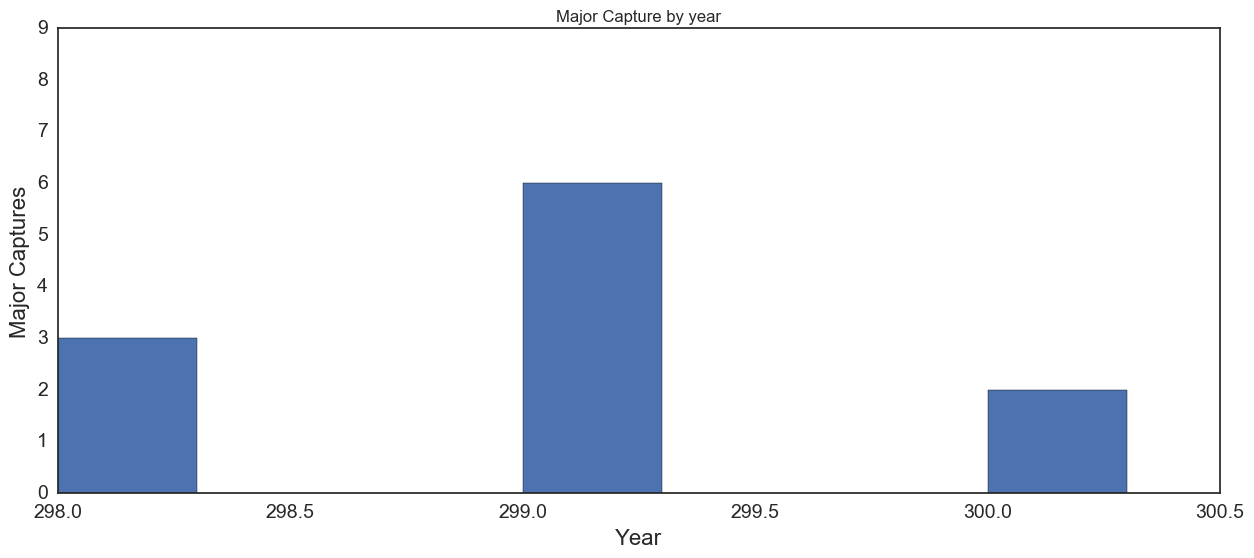

In [69]:
#battles[['year','major_capture']].groupby('year').size()
mc=battles[['year','major_capture']].groupby('year').sum().values
year=battles['year'].unique()
plt.bar(year,mc,width=0.3)
plt.ylim(0,9)
plt.xlabel('Year')
plt.ylabel('Major Captures')
plt.title('Major Capture by year')
plt.show()

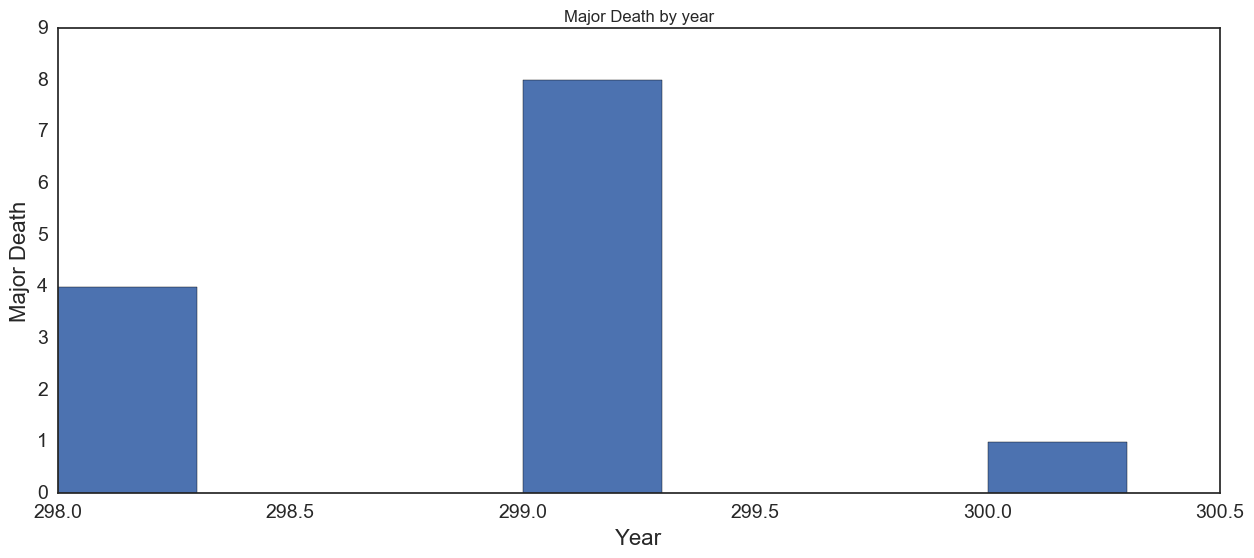

In [68]:
mc=battles[['year','major_death']].groupby('year').sum().values
year=battles['year'].unique()
plt.bar(year,mc,width=0.3)
plt.xlabel('Year')
plt.ylim(0,9)
plt.ylabel('Major Death')
plt.title('Major Death by year')
plt.show()

In [74]:
battles[['attacker_size','defender_size','attacker_outcome']].head()

,attacker_size,defender_size,attacker_outcome
0,15000.0,4000.0,win
1,NaN,120.0,win
2,15000.0,10000.0,win
3,18000.0,20000.0,loss
4,1875.0,6000.0,win


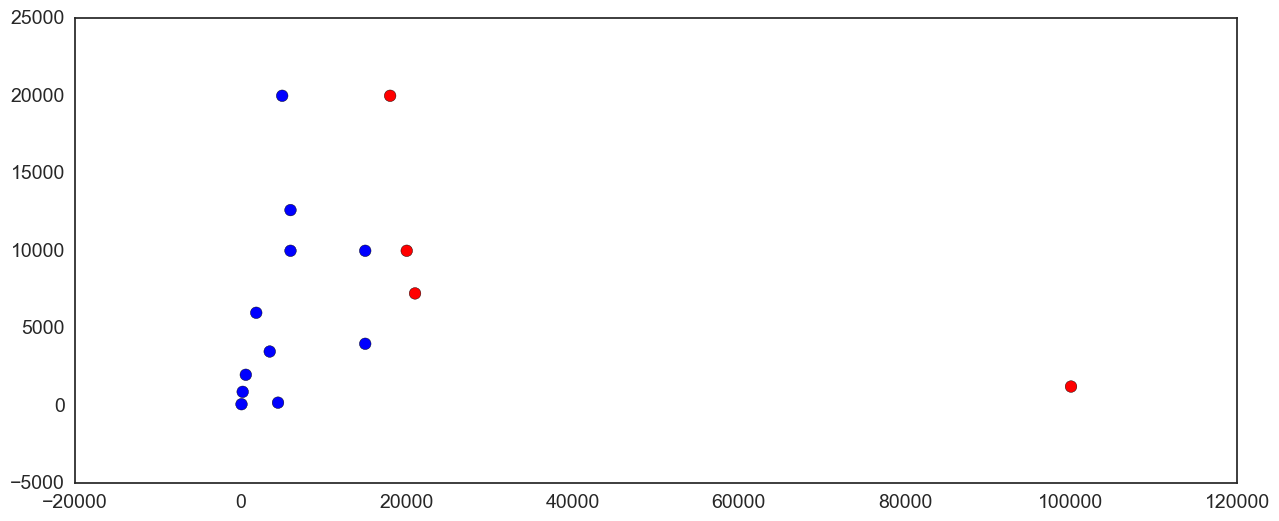

In [89]:
df=battles[['attacker_size','defender_size','attacker_outcome']].dropna()
colors=['b' if x=='win' else 'r' for x in df['attacker_outcome']]
plt.scatter(df['attacker_size'], df['defender_size'],s=70,c=colors)
plt.show()

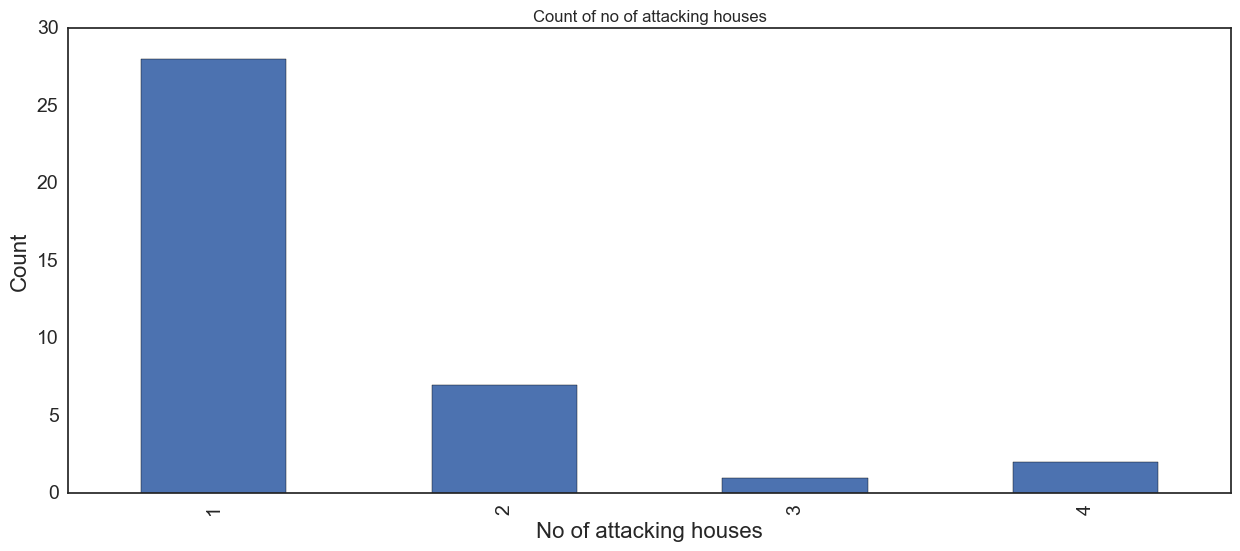

In [105]:
battles['attacker_count'].value_counts().sort_index().plot.bar()
plt.xlabel('No of attacking houses')
plt.ylabel('Count')
plt.title('Count of no of attacking houses')
plt.show()

In [130]:
battles[['attacker_1','attacker_2','attacker_3','attacker_4','defender_1','defender_2','defender_3','defender_4']].isnull().sum(axis=1)

array([['Lannister', nan, nan, nan, 'Tully', nan, nan, nan],
       ['Lannister', nan, nan, nan, 'Baratheon', nan, nan, nan],
       ['Lannister', nan, nan, nan, 'Tully', nan, nan, nan],
       ['Stark', nan, nan, nan, 'Lannister', nan, nan, nan],
       ['Stark', 'Tully', nan, nan, 'Lannister', nan, nan, nan],
       ['Stark', 'Tully', nan, nan, 'Lannister', nan, nan, nan],
       ['Lannister', nan, nan, nan, 'Darry', nan, nan, nan],
       ['Greyjoy', nan, nan, nan, 'Stark', nan, nan, nan],
       ['Greyjoy', nan, nan, nan, 'Stark', nan, nan, nan],
       ['Greyjoy', nan, nan, nan, 'Stark', nan, nan, nan],
       ['Stark', nan, nan, nan, 'Greyjoy', nan, nan, nan],
       ['Greyjoy', nan, nan, nan, 'Stark', nan, nan, nan],
       ['Greyjoy', nan, nan, nan, 'Stark', nan, nan, nan],
       ['Bolton', 'Greyjoy', nan, nan, 'Stark', nan, nan, nan],
       ['Stark', 'Tully', nan, nan, 'Lannister', nan, nan, nan],
       ['Baratheon', nan, nan, nan, 'Baratheon', nan, nan, nan],
       ['Lann

In [110]:
battles[['attacker_king','defender_king']].dropna().shape

(35, 2)

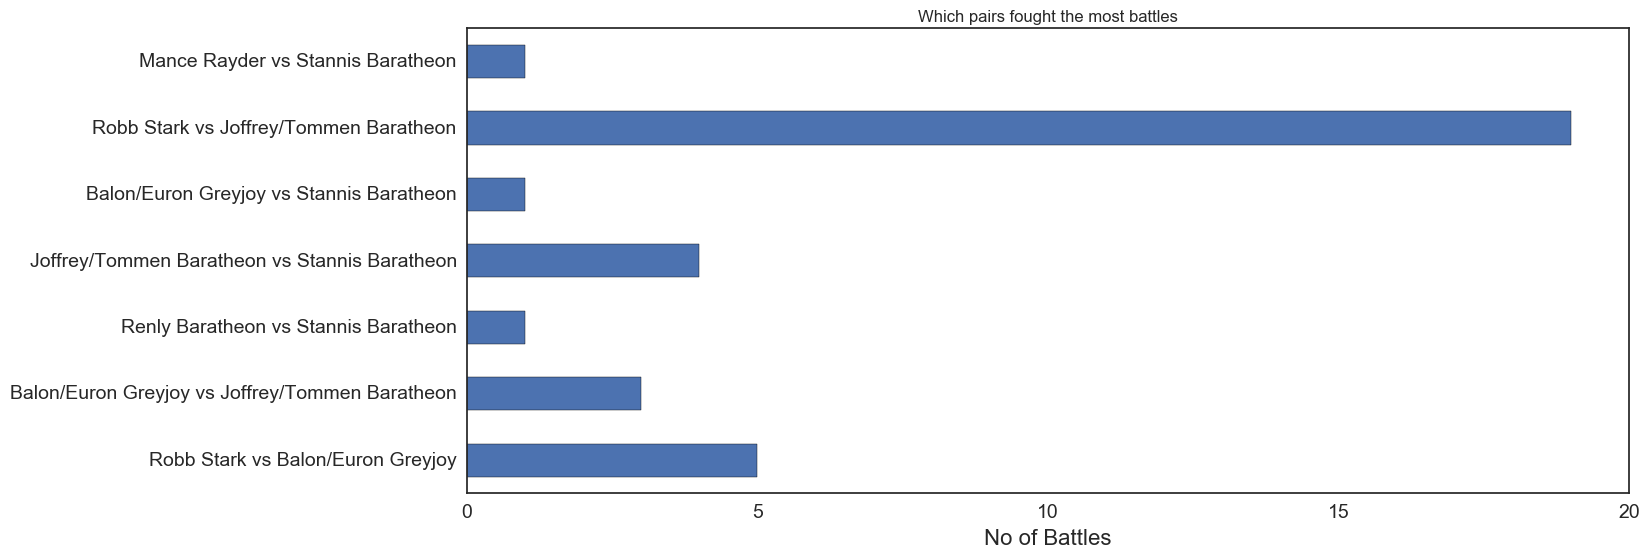

In [148]:
l=list(Counter([tuple(set(x)) for x in battles[['attacker_king','defender_king']].dropna().values if(len(set(x))>1) ]).items())
p=pd.DataFrame(l).plot.barh()
p.set(yticklabels=["%s vs %s"%(x[0],x[1])  for x in list(zip(*l))[0]  ])
plt.xlabel('No of Battles')
plt.title('Which pairs fought the most battles')
plt.legend().remove()
plt.show()

In [182]:
list(Counter([tuple(set(x)) for x in battles[['attacker_king','defender_king']].dropna().values if(len(set(x))>1)]).items())

,0,1
0,"(Robb Stark, Balon/Euron Greyjoy)",5
1,"(Balon/Euron Greyjoy, Joffrey/Tommen Baratheon)",3
2,"(Renly Baratheon, Stannis Baratheon)",1
3,"(Joffrey/Tommen Baratheon, Stannis Baratheon)",4
4,"(Balon/Euron Greyjoy, Stannis Baratheon)",1
5,"(Robb Stark, Joffrey/Tommen Baratheon)",19
6,"(Mance Rayder, Stannis Baratheon)",1


In [146]:
list(zip(*l))[0]

(('Robb Stark', 'Balon/Euron Greyjoy'),
 ('Balon/Euron Greyjoy', 'Joffrey/Tommen Baratheon'),
 ('Renly Baratheon', 'Stannis Baratheon'),
 ('Joffrey/Tommen Baratheon', 'Stannis Baratheon'),
 ('Balon/Euron Greyjoy', 'Stannis Baratheon'),
 ('Robb Stark', 'Joffrey/Tommen Baratheon'),
 ('Mance Rayder', 'Stannis Baratheon'))

In [139]:
["%s vs %s"%(x[0],x[1])  for x in list(zip(*l))[0]  ]

['Robb Stark vs Balon/Euron Greyjoy',
 'Balon/Euron Greyjoy vs Joffrey/Tommen Baratheon',
 'Renly Baratheon vs Stannis Baratheon',
 'Joffrey/Tommen Baratheon vs Stannis Baratheon',
 'Balon/Euron Greyjoy vs Stannis Baratheon',
 'Robb Stark vs Joffrey/Tommen Baratheon',
 'Mance Rayder vs Stannis Baratheon']

In [234]:
attacker_comm=battles[['attacker_king','attacker_commander']].dropna().groupby(['attacker_king'])['attacker_commander'].transform(lambda x: ','.join(set(x)))
[pd.DataFrame(attacker_comm).drop_duplicates().reset_index()]
#print(battles[['defender_king','defender_commander']].dropna().groupby('defender_king').sum())

[    index                                 attacker_commander
 0       0                                    Jaime Lannister
 1       1                                     Gregor Clegane
 2       2                       Jaime Lannister, Andros Brax
 3       3  Roose Bolton, Wylis Manderly, Medger Cerwyn, H...
 4       4                          Robb Stark, Brynden Tully
 5       5         Robb Stark, Tytos Blackwood, Brynden Tully
 6       7                                  Victarion Greyjoy
 7       8                                       Asha Greyjoy
 8       9                                      Theon Greyjoy
 9      10                         Rodrik Cassel, Cley Cerwyn
 10     12                                    Dagmer Cleftjaw
 11     13                        Ramsay Snow, Theon Greyjoy 
 12     15                  Stannis Baratheon, Davos Seaworth
 13     16  Tywin Lannister, Flement Brax, Gregor Clegane,...
 14     17            Roose Bolton, Vargo Hoat, Robett Glover
 15     

In [168]:
battles.keys()

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note', 'defender_count', 'attacker_count',
       'att_comm_count'],
      dtype='object')

In [233]:
battles[['attacker_king','attacker_commander']].dropna().groupby('attacker_king').sum().reset_index()

,attacker_king,attacker_commander
0,Balon/Euron Greyjoy,Victarion GreyjoyAsha GreyjoyTheon GreyjoyTheo...
1,Joffrey/Tommen Baratheon,"Jaime LannisterGregor CleganeJaime Lannister, ..."
2,Robb Stark,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H..."
3,Stannis Baratheon,"Stannis Baratheon, Davos SeaworthStannis Barat..."
